# Major League Baseball Data Analysis

### *Author:* Nicholas Di Nicola 


The Major League Baseball dataset contains data on salaries and other information (such as race, position and performance information) on baseball players in MLB in 1993.

We can start importing the core libraries we will neeed to carry out the analysis as well as reading the MLB dataset and get a taste of it. 

In [11]:
#importing necessary libraries 
import pandas as pd 
import numpy as np
from scipy import stats 

import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

#Set the plot style as GGPLOT 
plt.style.use("ggplot")

In [12]:
#Read the csv file containing the data 
df = pd.read_csv("mlb.csv")

In [13]:
#Check the shape of the dataframe 
df.shape

(352, 21)

In [14]:
#Chech the variable type of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   salary                    352 non-null    int64  
 1   player_position           352 non-null    object 
 2   race                      352 non-null    object 
 3   team_payroll              352 non-null    int64  
 4   years_played              352 non-null    int64  
 5   games_played              352 non-null    int64  
 6   career_at_bats            352 non-null    int64  
 7   career_runs               352 non-null    int64  
 8   career_hits               352 non-null    int64  
 9   career_doubles            352 non-null    int64  
 10  career_triples            352 non-null    int64  
 11  career_homeruns           352 non-null    int64  
 12  career_runs_batted_in     352 non-null    int64  
 13  career_batting_average    352 non-null    int64  
 14  career_wal

In [15]:
#Get a glimpse of the dataframe, retriving the first five raws 
df.iloc[:5].style

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
0,3375000,shortstop,black,38407380,8,918,3333,407,863,156,38,73,342,259,137,582,133,968,70.277970,18.844230,10.877800
1,3100000,firstbase,white,38407380,5,751,2807,370,840,148,18,46,355,299,341,228,41,994,70.277970,18.844230,10.877800
2,2900000,thirdbase,white,38407380,8,1056,3337,405,816,143,18,107,421,245,306,653,15,971,70.277970,18.844230,10.877800
3,1650000,outfield,black,38407380,12,1196,3603,437,928,19,16,124,541,258,316,725,32,977,70.277970,18.844230,10.877800
4,700000,outfield,black,38407380,17,2032,7489,1136,2145,270,142,40,574,286,416,1098,660,987,70.277970,18.844230,10.877800


### Descriptive statistics of the dataset 

Now that we have correctly imported the dataset, it is good practice to have a look at some descriptive statistics before beginning to work with the data. 

In [16]:
#See all the descriptive statitics for each variable in the dataset 
df.describe()

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
count,3.520000e+02,3.520000e+02,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,329.000000,329.000000,329.000000
mean,1.331514e+06,3.077320e+07,6.309659,645.423295,2155.704545,288.170455,580.889205,103.267045,16.590909,54.531250,263.122159,258.900568,210.926136,338.681818,65.096591,976.474432,72.638240,16.541950,10.819810
std,1.383952e+06,8.725344e+06,3.873810,536.499990,2013.393716,298.500277,571.632472,103.831374,21.395948,73.369759,281.741692,38.443636,227.191851,323.886980,112.548093,19.751430,15.249897,13.688558,9.402261
min,1.090000e+05,8.854000e+06,1.000000,7.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,111.000000,0.000000,0.000000,0.000000,800.000000,20.296300,3.741786,0.540870
25%,2.527000e+05,2.455733e+07,3.000000,230.000000,631.500000,73.000000,163.000000,26.000000,3.000000,8.000000,59.750000,245.000000,49.750000,101.000000,4.750000,969.000000,67.668960,8.007545,1.962080
50%,6.750000e+05,3.413650e+07,6.000000,518.500000,1583.000000,190.500000,416.000000,70.000000,9.000000,26.000000,172.000000,259.000000,137.000000,235.500000,24.500000,980.500000,74.619650,14.453980,10.877800
75%,2.250000e+06,3.779200e+07,9.000000,930.000000,3026.000000,405.500000,817.250000,146.250000,23.000000,70.000000,358.000000,275.000000,304.250000,474.000000,75.000000,988.000000,82.948860,18.755630,16.330650
max,6.200000e+06,4.286600e+07,20.000000,2729.000000,10554.000000,1570.000000,3025.000000,634.000000,142.000000,432.000000,1710.000000,625.000000,1286.000000,1891.000000,1042.000000,1000.000000,94.696270,73.960030,31.037500


### Visualise Numerical Variables 

We can now visualise some important numerical variables present in the dataset and see how they behave based on some other categorical variables. The `joinplot` function in seaborn lets us visualise a scatter plot plus a fitted regression line and the two graphical numerical variables distribution at the same time. 

Text(0.5, 32.99999999999995, 'Years Played')

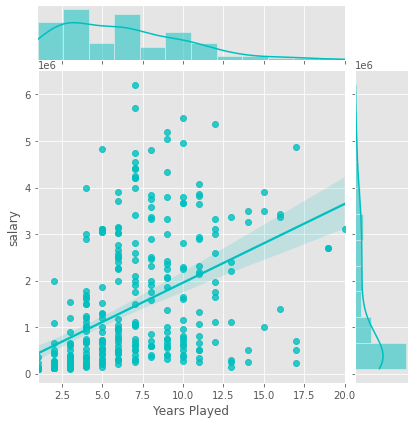

In [17]:
#scatter plot between years played and salary, with lm line and a histogram for each variable 
sns.jointplot(x="years_played", y="salary", data=df, 
              kind="reg", color = "c")

plt.xlabel("Years Played")

First of all, we can see the relationship between the salary and how many years the players played. As we can see in the graph the more one played the higher the salary. Furthermore, the `years_played` variable is right skewed, which it means that the majority had not that much experience at that time, while the `salary` variable is left skewed, hence the majority of players had a high salary in 1993.  

Let's go further in the salary analysis and see which is the highest paid player position in the dataset. 

Text(0.5, 0, '')

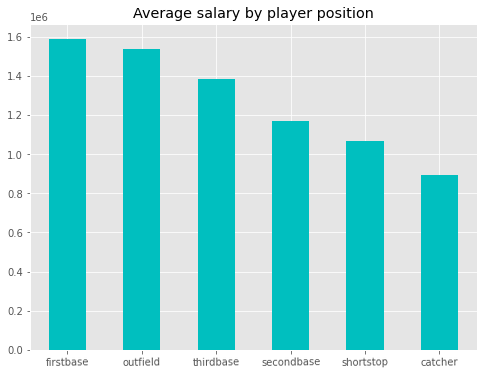

In [18]:
#group the data by player position categorical variale and calculate the salary mean for each level, then sort the values in a descending order 
df_grouped_position_salary = df.groupby("player_position").agg({"salary": "mean"}
                                                         ).rename(columns={"salary" : "average salary"}
                                                         ).sort_values("average salary", ascending = False)

#plot the grouped dataset with a barchart 
df_grouped_position_salary.plot(kind = "bar", rot = 0.90, legend = False, figsize = [8, 6], color = "c")
plt.title("Average salary by player position")
plt.xlabel("")

**The firstbase position is the highest paid position** probabibly because one of the most crucial role in baseball, indeed, the first baseman is responsible not only for fielding ground balls hit in his vicinity but also for catching throws from other infielders to force a runner out at first base. The first baseman often has to "scoop" one-hop throws from an infielder or pick low throws out of the dirt. Besides, **the outfield position was the second one most paid position in 1993.** The outfield position consists of left, center, and right field. They catch any pop flies and throw the balls into the infield. The pitcher delivers the pitches to the batters hitting on the opposing team. Lastly, the catcher catches the pitcher's pitches. On the other hand, **shortstop and cather positions are the least paid positions.** In fact, the catcher is a position in baseball that plays behind home plate, the main job of the catcher is to catch pitches and to help call the game. However, it is interesting to see the shortstops as one of the least paid position in 1993, because it is now considered as one of the hardest position where to play in, indeed the shortstop is most of the time the captain of the infield and takes charge on balls hit in the air as well as communication among infielders.

Now that we know what are the highest paied positions, let's see how the players' salary behaves when compared with the players' race. The `barplot` function in Seaborn shows point estimates and confidence intervals as rectangular bars.

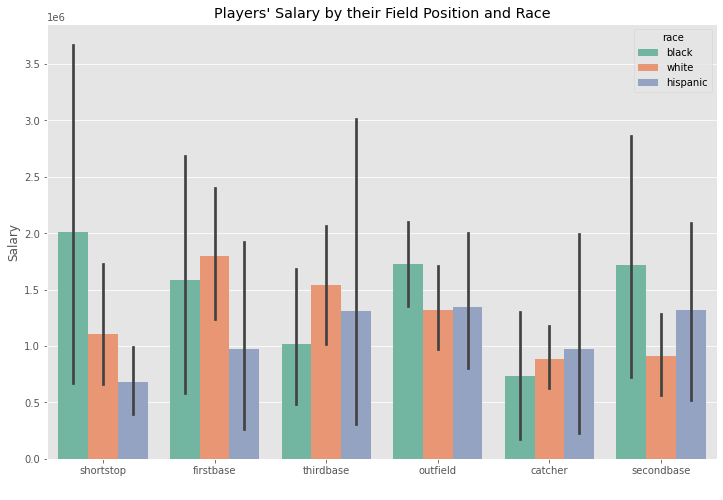

In [19]:
#set a empty canva where to put the bargrahp 
fig, ax = plt.subplots()

#create the bargraphs by player's race
sns.barplot(data = df, 
            x = "player_position", 
            y = "salary", 
            hue = "race",  palette="Set2")

#Set title and labels for the axis 
plt.title("Players' Salary by their Field Position and Race")
plt.xlabel(" ")
plt.ylabel("Salary")

#set the graph's size
fig.set_size_inches(12, 8)

This graph is quite interesting, indeed. We already know that firstbase, outfield and thirdbase positions are the ones with the highest average salary, so let us have a closer look at the. It seems like white players are paid more when they play in firstbase or thirdbase, however black players are the ones with the highest salary when the play in outfield while the white players have the lowest one. Besides, black players seem to have a very high salary in each position. 

Lastly, we can now dig a little bit deeper and see how the salary changed over the players' career, based on both the poistion where they played and their race. The nest six scatter plots show the relationship between`years_played` and `salary` by `race` faceted by the `player_position`. A regression line shows the best fitted line for each level of the categorical variable `race` to help us better visualise how salary behaves by race of the players' career. For the visualisation's sake, we will stick with the same colours we have used to distiguish player's race in the last graph.

Text(778.8885677083334, 0.5, 'Salary')

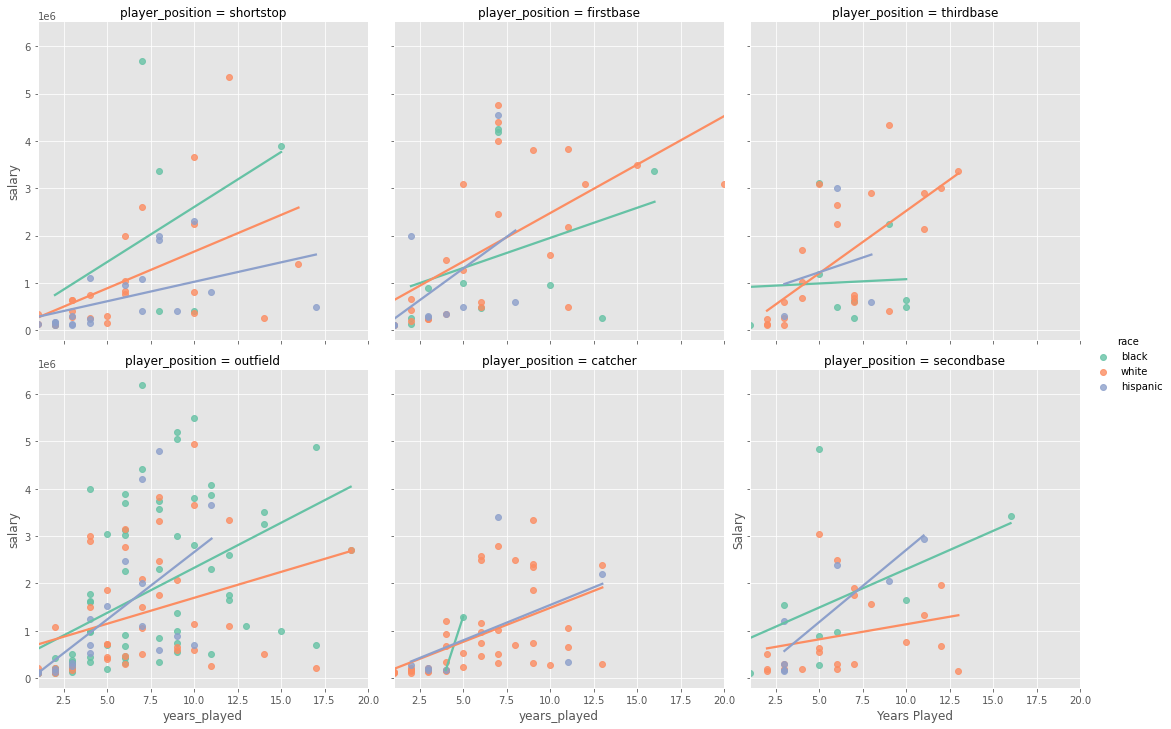

In [20]:
#Scatter plot with a regression line 
sns.lmplot(x = "years_played", y = "salary", data = df, 
           hue= "race", col = "player_position", col_wrap=3, 
           palette="Set2", ci = None)

#Change the plot title and y label. 
plt.xlabel("Years Played")
plt.ylabel("Salary")

Let's always focus first on the firstbase position. It seems that at the very early stage of their careers black players are paid slightly more than others in this position, however, they are then overcame by both white and hispanic players. Besides, it is interesting to see how the slope of the violet line is higher than the red one. Hence, white players had more experience than others regarding the firstbase position. Perhaps, the situation has changed right now, and hispanic first base players are the highest paid. 

### Missing Values 

Before proceding to the next steps, we need to check if there are any missing values in the dataset. 

In [21]:
#Check for missing values
df.isnull().sum()

salary                       0
player_position              0
race                         0
team_payroll                 0
years_played                 0
games_played                 0
career_at_bats               0
career_runs                  0
career_hits                  0
career_doubles               0
career_triples               0
career_homeruns              0
career_runs_batted_in        0
career_batting_average       0
career_walks                 0
career_strike_outs           0
career_stolen_bases          0
career_fielding_percent      0
white_percent_in_city       23
black_percent_in_city       23
hispanic_percent_in_city    23
dtype: int64

The withe, black and hispanic percent in the city variables have 23 missing values respectively. Due to the fact that we have 21 variables in total and 351 observations, we will not drop the entire rows but instead, we will interpolate the missing values considering the value right before and right after each individual NaN. 

In [22]:
#Fill missing values taking the mean of the value before and after the NaN
df = df.interpolate(method = "linear", axis = 0).bfill().ffill()

#Check for missing values
df.isnull().sum()

salary                      0
player_position             0
race                        0
team_payroll                0
years_played                0
games_played                0
career_at_bats              0
career_runs                 0
career_hits                 0
career_doubles              0
career_triples              0
career_homeruns             0
career_runs_batted_in       0
career_batting_average      0
career_walks                0
career_strike_outs          0
career_stolen_bases         0
career_fielding_percent     0
white_percent_in_city       0
black_percent_in_city       0
hispanic_percent_in_city    0
dtype: int64

We have now all the dataset filled with values and ready to move on the next step.

### Distribution of numerical variables

It is always worth to visualise the distribution of some numerical variables in the dataset. Below, I have plotted the distribution of five important numerical variables in the dataset: `team_payroll`, `games_played`, `career_runs`, `career_doubles` and `career_triples`. 

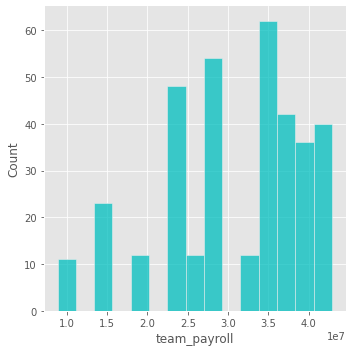

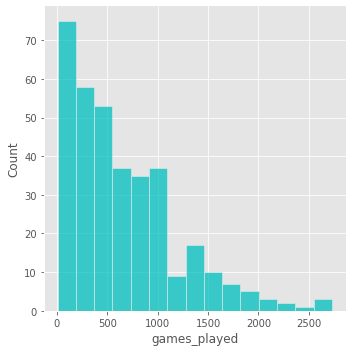

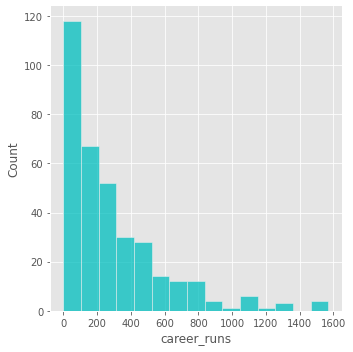

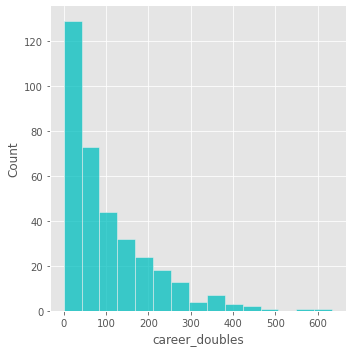

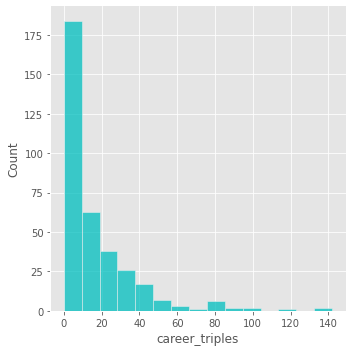

In [23]:
#Create a new dataset wit the numerical variables we want plot 
plot_distribution = df[["team_payroll", "games_played", "career_runs", "career_doubles", "career_triples"]]

#Iterate over the dataset variables and plot a histogram for each of them 
for x in plot_distribution: 
    sns.displot(plot_distribution[x], bins = 15, color = "c")
    plt.xlabel(x)
    plt.show()

Team payroll is a little bit left skewed, which is the tendency of a high teams payrol. Not surpisingly, all of the others plotted variables are heavily right skewed, indeed, it is quite hard to do runs, doubles and triples in baseball. 

Earlier, I have filled the missing values of the variables: White, Black and Hispanic percent in the city, thereby now we can also have a better look at their distributions. 

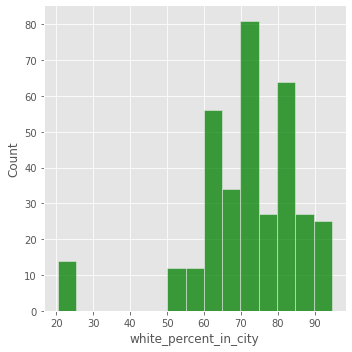

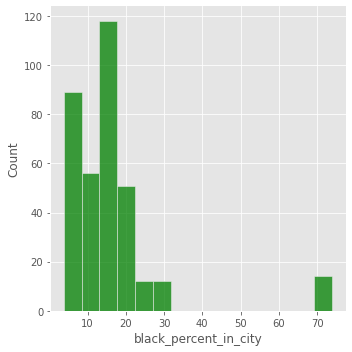

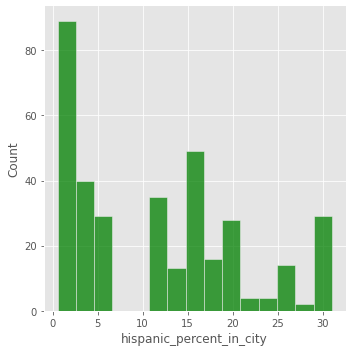

In [24]:
#Create a new dataset with the numerical variables we want to plot 
plot_distribution2 = df[["white_percent_in_city", "black_percent_in_city", "hispanic_percent_in_city"]]

#Iterate over the dataset variables and plot a histogram for each of them 
for x in plot_distribution2: 
    
    sns.displot(plot_distribution2[x], bins = 15, color = "g")
    plt.xlabel(x)
    plt.show()

As shown is the three graphs above, there is a predominance of white people, while black people clearly are the minorty. Hispanics are well distributed overall, though with a tendancy to the be less than others.  

### Display unique values of a categorical variable 

There are only two categorical variables in the dataset, `race` and `player_position`. Therefore, it is valueable to see what are their unique values. 

In [25]:
#display unique values of race variable 
print("Race unique values with percentages: ")
print(df["race"].value_counts(normalize = True)*100)

print("")

#display unique values of player position variable 
print("Player_position unique values with percentages: ")
print(df["player_position"].value_counts(normalize = True)*100)

Race unique values with percentages: 
white       51.136364
black       30.681818
hispanic    18.181818
Name: race, dtype: float64

Player_position unique values with percentages: 
outfield      38.636364
catcher       14.772727
shortstop     13.920455
firstbase     12.784091
secondbase    10.227273
thirdbase      9.659091
Name: player_position, dtype: float64


As seeen earlier on the graphs, the `race` variable has three levels: White (≈51.13%), Black (≈30.68%) and Hispanic (≈18.19%). While, the `player_position` variable has six levels: Outfield (≈38.64%), Catcher (≈14.76%), Shortstop (≈13.92%), Firstbase (≈12.79%), Secondbase (≈10.23%), Thirdbase (≈9.66%).  

## Inferential Statistical Tests

### Contingency Table

We can investigate the dependency between the two caterogical variables `player_position` and `race` using a chi-square test. 
We first need to build a contingency table, which will show how often different values of the two categorical variables co-occur. 

In [26]:
#Build the contigency table between the two categorical variables 
cont_table = pd.crosstab(df['player_position'], df['race'])

# print the contingency table
cont_table

race,black,hispanic,white
player_position,,,
catcher,2,7,43
firstbase,10,9,26
outfield,72,19,45
secondbase,8,7,21
shortstop,7,19,23
thirdbase,9,3,22


For instance, we can see how the outfield is the position where there are most of the players, in which 72 are blacks, 19 are hispanics and 45 are whites. However, let's visualise the contigency table with a bar chart to get a better view of the data. 

<AxesSubplot:xlabel='player_position'>

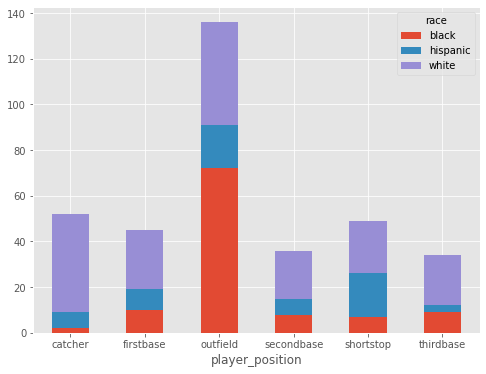

In [27]:
#Plot the cont_table using a barchart 
cont_table.plot(kind="bar", stacked=True, rot=0, figsize = [8, 6])

### Chi-square test 

We can now proceed performing the statistical test to check the independence of the two variables using the chi-square test. The null hypothesis of the chi-square test is always that the two variables are independent, the alternative hypothesis is that they are dependent. We will use a 95% clevel of confidence. 

$H_0:$ The two variables are indipendent

$H_A:$ The two variables are dipendent

In [28]:
#perform the chi_square test and print the p_value 
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table)
print(f"p-value: {p_val}")

p-value: 2.2934333235364454e-12


As a result we have got a p-value wich is less than 0.05, thereby **we reject the null hypothesis that there is no dependence between the players' position and their gender**. Hence, we can state that there are statistical evidence that the player position depends on the player's race. 

### Descriptive statistics of a dataset's subset 

Bases on our analysis, we know that firstbase is the highest paid position (for whithe players), while outfield is the second highest, and black players are the most paid here. Hence, let's filter the dataset by `player_position` and `race`, creating to different subsets, one displaying descriptive statistics for white forstbase players, and the other one descriptive statistics for black outfield players. 

In [29]:
#Filter the dataset only for firstbase position and white race
white_firstbase = df[(df["player_position"] == "firstbase") & (df["race"] == "white")]

#Display descriptive statistics of the subset 
white_firstbase.describe()

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
count,2.600000e+01,2.600000e+01,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,1.799058e+06,3.382559e+07,6.692308,782.384615,2758.769231,396.769231,782.192308,151.000000,19.153846,91.615385,400.961538,267.346154,312.692308,403.192308,52.346154,988.692308,70.536003,18.704102,10.759895
std,1.586403e+06,7.029362e+06,4.645593,624.072501,2429.020450,382.611062,736.982280,146.609959,29.894069,86.183097,366.369811,35.103210,269.861412,338.528819,100.358136,12.495661,18.236825,17.566888,9.160332
min,1.100000e+05,1.558967e+07,1.000000,7.000000,14.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,143.000000,5.000000,5.000000,0.000000,940.000000,20.296300,3.741786,0.540870
25%,3.712500e+05,2.747403e+07,3.000000,260.250000,745.250000,89.750000,185.000000,32.000000,2.000000,27.000000,103.000000,252.250000,82.250000,141.000000,3.000000,991.000000,65.214739,9.049699,2.887507
50%,1.381250e+06,3.565064e+07,6.000000,736.500000,2555.500000,284.500000,659.500000,126.000000,11.000000,52.500000,318.000000,264.000000,276.500000,305.000000,21.000000,993.000000,72.857655,13.791692,8.310735
75%,3.100000e+06,3.943426e+07,9.750000,1019.750000,3735.000000,551.000000,1045.500000,198.000000,17.750000,161.500000,604.500000,295.750000,451.250000,631.250000,40.500000,994.000000,82.722262,18.448813,16.330650
max,4.750000e+06,4.286600e+07,20.000000,2562.000000,9789.000000,1514.000000,3005.000000,634.000000,134.000000,298.000000,1520.000000,311.000000,1057.000000,1430.000000,412.000000,1000.000000,94.696270,73.960030,31.037500


In [30]:
#Filter the dataset only for outfield position and black race
black_outfield = df[(df["player_position"] == "outfield") & (df["race"] == "black")]

#Display descriptive statistics of the subset 
black_outfield.describe()

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
count,7.200000e+01,7.200000e+01,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,1.728032e+06,3.036373e+07,6.833333,744.069444,2571.305556,375.833333,711.041667,119.444444,24.597222,73.500000,327.013889,265.472222,257.361111,436.513889,128.388889,979.597222,72.733924,17.166474,10.099602
std,1.652457e+06,9.634874e+06,4.212657,596.065275,2256.142680,356.807677,654.833501,113.016251,26.888219,90.239587,334.627878,24.957977,261.596954,375.358195,182.197351,11.259625,16.564128,15.176151,8.982759
min,1.090000e+05,8.854000e+06,1.000000,12.000000,12.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,167.000000,0.000000,5.000000,0.000000,926.000000,20.296300,3.741786,0.540870
25%,3.500000e+05,2.338752e+07,3.000000,288.750000,847.750000,99.750000,202.000000,31.000000,7.000000,10.750000,81.000000,253.250000,74.500000,148.250000,25.000000,974.000000,67.557404,8.007545,1.922861
50%,1.000000e+06,3.413650e+07,6.000000,584.500000,1952.000000,271.500000,513.500000,70.500000,16.500000,38.000000,227.000000,264.500000,167.500000,289.500000,60.500000,982.000000,74.619650,15.651897,8.310735
75%,3.031250e+06,3.794584e+07,9.000000,1027.250000,3635.250000,551.750000,998.000000,190.750000,34.250000,105.000000,542.750000,281.250000,327.250000,718.250000,151.500000,985.250000,83.115810,18.755630,16.330650
max,6.200000e+06,4.286600e+07,19.000000,2707.000000,10047.000000,1551.000000,2866.000000,493.000000,142.000000,432.000000,1710.000000,327.000000,1286.000000,1503.000000,1042.000000,1000.000000,94.696270,73.960030,31.037500


It is interesting to see how the average salary is slightly higher in the `white_firstbase` subset, however the maximum salary's value is way more high the `black_outfield`. Besides, as we have seen earlier in the numerical distribution histograms, `career_double` and `career_triple` are very hard to occcur, though the average in both subset is quite small, especially for the `career_triples`, it seems that black oufielders has a higher average and also a smaller standard deviation. Moreover, when comparing `career_stolen_bases` and `career_strike_outs` means, they are both higher for black outfielders too.   

### Indipendent two-sample t-test 

We can now investigate if there is or not a statistical difference in the population mean in salary based on different people's race. However, before performing an indipenddent two-sample t-test we need to subset the dataset for the values we are interested in. This, will also allow us to examine the different sample values mean before performing the statistical test.  

In [31]:
white = df[df["race"] == "white"]["salary"]

print(f"White players average salary: ${np.mean(white)}")

black = df[df["race"] == "black"]["salary"]

print(f"Black players average salary: ${np.mean(black)}")

hispanic = df[df["race"] == "hispanic"]["salary"]

print(f"Hispanic players average salary: ${np.mean(hispanic)}")

White players average salary: $1237649.8555555556
Black players average salary: $1654350.462962963
Hispanic players average salary: $1050722.921875


Blacks have the highest average salary out of the three, while though whites and hispanics are closer, whites's salary is a bit higher than the other one. 

We are now ready to perform an indipendent two-sample t-test, comparing salary for blacks, whites and hispanics. The null hypothesis is that the difference between the two population means equal 0, hence there is no difference between them. The alternative hypothesis is that the mean of one variable is significantly lower or higher than the mean of the other, hence there is difference between them. 

$H_0: \mu x- \mu y = 0$

$H_A: \mu x - \mu y \ne 0$

Due to the fact we have three races, we will test each possible pair, drawing our conclusion for each of them. As always we will use a 95% level of confidence. 

Let's start performing an indipendent two-sample t-test for white and black. 

In [32]:
#Indipendent two sample t_test: White vs Black 
t_val, p_val = stats.ttest_ind(white, black)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: -2.439220849805341, p-value: 0.015326987986046892


We have got a t-value: -2.44 < -1.96 and a p-value: 0.015 < 0.05, hence **we reject the null hypothesis that the difference between the two population mean is zero**. In other words, there is a statistical significant difference between the population salary mean for black and white players. 

In [33]:
#Indipendent two sample t_test: White vs Hispanic
t_val, p_val = stats.ttest_ind(white, hispanic)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 1.0385906799410132, p-value: 0.3000317261088653


Here, we have got a t-value: 1.04 < 1.96 and a p-value: 0.3 > 0.05, hence **we fail to reject the null hypothesis that the difference between the two population mean is zero**. In other words, there is not statistical significant difference between the population salary mean for white and hispanic players. 

In [34]:
#Indipendent two sample t_test: Black vs Hispanic
t_val, p_val = stats.ttest_ind(black, hispanic)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 2.5754827267821643, p-value: 0.010860957887189545


Lastly, for the third test we have got a t-value: 2.57 > 1.96 and a p-value: 0.01 < 0.05, hence **we can reject the null hypothesis that the difference between the two population mean is zero**. In other words, there is a statistical significant difference between the population salary mean for black and hispanic players. 

In conclusion, there is a statistical difference in the population salaries mean between black players and both with and hispanic players, and as suggested from our sample probably black players have a higher salary then the others two. However, there is not statistical significant difference in the population salaries mean betwen white and hispanic players. 

### Pivot Tables 

So far we have figured out a lot about the dataset. Let us know display a summary of our dataset grouped by both the `player_position` and `race` variables. Doing so, we wil have another perspective of the relationship between the player's race and its position in the field, comparing each possible outcome with the mean of all the numerical variables. Because in the next step we will build a linear regression model predicting the player's salary, let's sort the salarys' value in a descending order. 

In [35]:
df.groupby(["player_position", "race"]).mean().sort_values(["salary"], ascending = False)

salary  team_payroll  years_played  \
player_position race                                                 
shortstop       black     2.007098e+06  3.466286e+07      7.428571   
firstbase       white     1.799058e+06  3.382559e+07      6.692308   
outfield        black     1.728032e+06  3.036373e+07      6.833333   
secondbase      black     1.715208e+06  3.197668e+07      6.375000   
firstbase       black     1.582917e+06  3.199732e+07      7.100000   
thirdbase       white     1.540992e+06  3.131157e+07      6.272727   
outfield        hispanic  1.344532e+06  3.185396e+07      5.368421   
                white     1.319637e+06  2.939990e+07      6.555556   
secondbase      hispanic  1.315357e+06  2.914018e+07      5.428571   
thirdbase       hispanic  1.309722e+06  2.874838e+07      5.666667   
shortstop       white     1.103050e+06  3.171319e+07      6.391304   
thirdbase       black     1.019889e+06  3.138909e+07      6.666667   
firstbase       hispanic  9.778333e+05  2.639401e+07      3.777778   
catcher         hispanic  9.702143e+05  2.915675e+07      6.142857   
secondbase      white     9.142063e+05  3.097918e+07      6.476190   
catcher         white     8.871512e+05  3.140220e+07      5.837209   
                black     7.360000e+05  2.149330e+07      4.500000   
shortstop       hispanic  6.827105e+05  2.859953e+07      5.842105   

                          games_played  career_at_bats  career_runs  \
player_position race                                                  
shortstop       black       843.857143     2833.857143   367.285714   
firstbase       white       782.384615     2758.769231   396.769231   
outfield        black       744.069444     2571.305556   375.833333   
secondbase      black       725.750000     2351.500000   358.875000   
firstbase       black       820.500000     2860.500000   398.800000   
thirdbase       white       710.500000     2448.318182   330.090909   
outfield        hispanic    583.052632     2019.684211   282.263158   
                white       697.133333     2337.288889   304.333333   
secondbase      hispanic    611.285714     2064.142857   259.857143   
thirdbase       hispanic    423.333333     1257.333333   175.000000   
shortstop       white       650.565217     2088.130435   271.434783   
thirdbase       black       565.222222     1913.333333   250.000000   
firstbase       hispanic    340.666667     1165.444444   150.333333   
catcher         hispanic    520.428571     1654.857143   166.142857   
secondbase      white       681.190476     2206.666667   288.476190   
catcher         white       422.162791     1216.023256   122.651163   
                black       183.500000      563.000000    57.000000   
shortstop       hispanic    533.842105     1683.210526   184.789474   

                          career_hits  career_doubles  career_triples  \
player_position race                                                    
shortstop       black      744.285714      118.142857       24.571429   
firstbase       white      782.192308      151.000000       19.153846   
outfield        black      711.041667      119.444444       24.597222   
secondbase      black      677.000000      112.000000       22.000000   
firstbase       black      792.600000      142.000000       11.700000   
thirdbase       white      653.681818      127.636364       13.363636   
outfield        hispanic   542.263158       93.368421       19.368421   
                white      620.955556      110.955556       19.977778   
secondbase      hispanic   571.571429       86.285714       15.714286   
thirdbase       hispanic   344.666667       66.333333        4.333333   
shortstop       white      542.565217      111.913043       16.826087   
thirdbase       black      511.444444       92.444444       12.444444   
firstbase       hispanic   321.000000       61.555556        6.111111   
catcher         hispanic   436.000000       72.571429        7.000000   
secondbase      white      579.476190     

Again, not surpisingly we have **white firstbase player and black outdielder in the second and third position respictively.** However, it is quite interesting to see **black shortstop player on top of the list as the combination with the highest mean salary and also highest mean years played,** indeed, as we seen in the first stage of the analysis, it is a position which requires experience because it is the captain and one of the most important position within the field. At the same time, we can see how black shortstop players were paid on average twice more than white and hispanic players in the same position. Probably, they were simply stronger in this role. 

### One-Hot Encoding 

Before start building our linear regression model we have to be sure to do not have missing values and categorical variables in the datast. We have already dealt with the missing values earlier. However, we still have transform the categorical variables in numerical variables. We can easily achieve that using a concept calles __*One-Hot encoding* or *Dummy Variables*__. It consinsts in creating a binary variable for each level of one a categorical variable. For instance, considering the `race` column, we know there are three levels: white, black and hispanic. Hence, we will build a specific individual column for each of those three levels. Theese columns will be binary indeed, in which: 0 = No and 1 = Yes. 

First of all, we are going to create a subset conaining the dummy variables for thw two categorical variables in the dataset: `player_position` and `race`.

In [36]:
#Get the dummy variables 
dummy_variables = pd.get_dummies(df[["player_position", "race"]])

#Dispay the subset 
dummy_variables.head(5)

,player_position_catcher,player_position_firstbase,player_position_outfield,player_position_secondbase,player_position_shortstop,player_position_thirdbase,race_black,race_hispanic,race_white
0,0,0,0,0,1,0,1,0,0
1,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,1
3,0,0,1,0,0,0,1,0,0
4,0,0,1,0,0,0,1,0,0


Here we are with our dummy variables. Now, we only need to add them to the original dataset, deleting the original categorical variables. 

In [37]:
#Drop the two categorical variables 
df_dropped = df.drop(["player_position", "race"], axis = 1)

#Add the dummy variables to the dataset 
df_final = pd.concat([df_dropped, dummy_variables], axis = 1)

#Display the first 5 rows of the final dataset 
df_final.head(5).style

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city,player_position_catcher,player_position_firstbase,player_position_outfield,player_position_secondbase,player_position_shortstop,player_position_thirdbase,race_black,race_hispanic,race_white
0,3375000,38407380,8,918,3333,407,863,156,38,73,342,259,137,582,133,968,70.277970,18.844230,10.877800,0,0,0,0,1,0,1,0,0
1,3100000,38407380,5,751,2807,370,840,148,18,46,355,299,341,228,41,994,70.277970,18.844230,10.877800,0,1,0,0,0,0,0,0,1
2,2900000,38407380,8,1056,3337,405,816,143,18,107,421,245,306,653,15,971,70.277970,18.844230,10.877800,0,0,0,0,0,1,0,0,1
3,1650000,38407380,12,1196,3603,437,928,19,16,124,541,258,316,725,32,977,70.277970,18.844230,10.877800,0,0,1,0,0,0,1,0,0
4,700000,38407380,17,2032,7489,1136,2145,270,142,40,574,286,416,1098,660,987,70.277970,18.844230,10.877800,0,0,1,0,0,0,1,0,0


The above dataset is th one we will use to perform the multiple linear regression analysis and to build our model.

### Correlation Matrix 

Before starting the linear regression analysis, let us look at the Person correlation coefficient matrix to get a better idea of the correlation between the independent variable (our target) and the dependent variables (the predictors). Also, we will not look at the correlation coefficients between the independent variables now, but we will come back to this later, once we will have built the most possible parsimonious model. 

In [38]:
#Compute the corrrelation between each variable in the daset using the pearson method 
corrMatrix = df_final.corr(method = "pearson") 

#Print the Pearson correlation matrix 
corrMatrix.style

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city,player_position_catcher,player_position_firstbase,player_position_outfield,player_position_secondbase,player_position_shortstop,player_position_thirdbase,race_black,race_hispanic,race_white
salary,1.000000,0.220123,0.473349,0.584546,0.611377,0.643348,0.619335,0.622921,0.468960,0.604904,0.644419,0.279291,0.581829,0.538225,0.362984,0.066248,0.001058,0.029431,-0.042521,-0.132251,0.070718,0.119318,-0.039396,-0.076327,0.012098,0.155416,-0.095780,-0.069482
team_payroll,0.220123,1.000000,0.174519,0.172700,0.168567,0.208775,0.167737,0.156786,0.156106,0.134528,0.156838,0.081330,0.149743,0.164550,0.121119,-0.042996,-0.190695,0.190797,0.032574,-0.002599,0.050963,-0.047374,0.002714,0.007109,0.012487,0.004665,-0.075237,0.053748
years_played,0.473349,0.174519,1.000000,0.941154,0.899723,0.839877,0.882268,0.840570,0.741593,0.671924,0.821112,0.194804,0.813086,0.763459,0.556820,0.109930,0.060642,0.004244,-0.100507,-0.051955,-0.010853,0.046585,-0.005206,0.001754,0.001172,0.085288,-0.111997,0.007730
games_played,0.584546,0.172700,0.941154,1.000000,0.988525,0.937213,0.977303,0.937346,0.822149,0.768165,0.923399,0.264715,0.905553,0.832479,0.608380,0.091794,0.080786,-0.033666,-0.079291,-0.170354,0.040797,0.089787,0.020209,-0.009387,0.000783,0.106238,-0.107626,-0.014970
career_at_bats,0.611377,0.168567,0.899723,0.988525,1.000000,0.955979,0.994441,0.957113,0.841857,0.789660,0.943223,0.284668,0.909050,0.833115,0.626594,0.076934,0.092084,-0.050024,-0.074203,-0.187554,0.058462,0.103049,0.009306,-0.023612,0.007467,0.116179,-0.100074,-0.029969
career_runs,0.643348,0.208775,0.839877,0.937213,0.955979,1.000000,0.963228,0.929416,0.854123,0.756055,0.900212,0.307602,0.907716,0.782044,0.698237,0.068478,0.083566,-0.037608,-0.078155,-0.226536,0.076761,0.135585,0.011760,-0.049431,0.007718,0.159785,-0.116361,-0.057632
career_hits,0.619335,0.167737,0.882268,0.977303,0.994441,0.963228,1.000000,0.963755,0.852151,0.779407,0.941788,0.318535,0.909560,0.805973,0.631485,0.077727,0.097402,-0.057707,-0.071832,-0.192442,0.074703,0.106711,0.011070,-0.038439,0.004511,0.128562,-0.100609,-0.040981
career_doubles,0.622921,0.156786,0.840570,0.937346,0.957113,0.929416,0.963755,1.000000,0.792769,0.795178,0.935105,0.311524,0.882573,0.783596,0.547216,0.065717,0.115404,-0.063290,-0.092166,-0.180221,0.102816,0.074430,-0.008917,-0.037288,0.030416,0.088416,-0.126600,0.016111
career_triples,0.468960,0.156106,0.741593,0.822149,0.841857,0.854123,0.852151,0.792769,1.000000,0.510482,0.713132,0.268499,0.724018,0.650191,0.747898,0.056645,0.082921,-0.052728,-0.056153,-0.231484,-0.030499,0.213449,-0.001875,0.023833,-0.065309,0.161225,-0.051994,-0.108626
career_homeruns,0.604904,0.134528,0.671924,0.768165,0.789660,0.756055,0.779407,0.795178,0.510482,1.000000,0.931284,0.195461,0.780489,0.833286,0.321691,0.045939,0.085122,-0.053481,-0.058541,-0.160272,0.158754,0.174301,-0.121843,-0.152234,0.029133,0.124407,-0.137632,-0.008581


We can also plot the matrix to have a graphical representation of the Pearson's coefficients. 

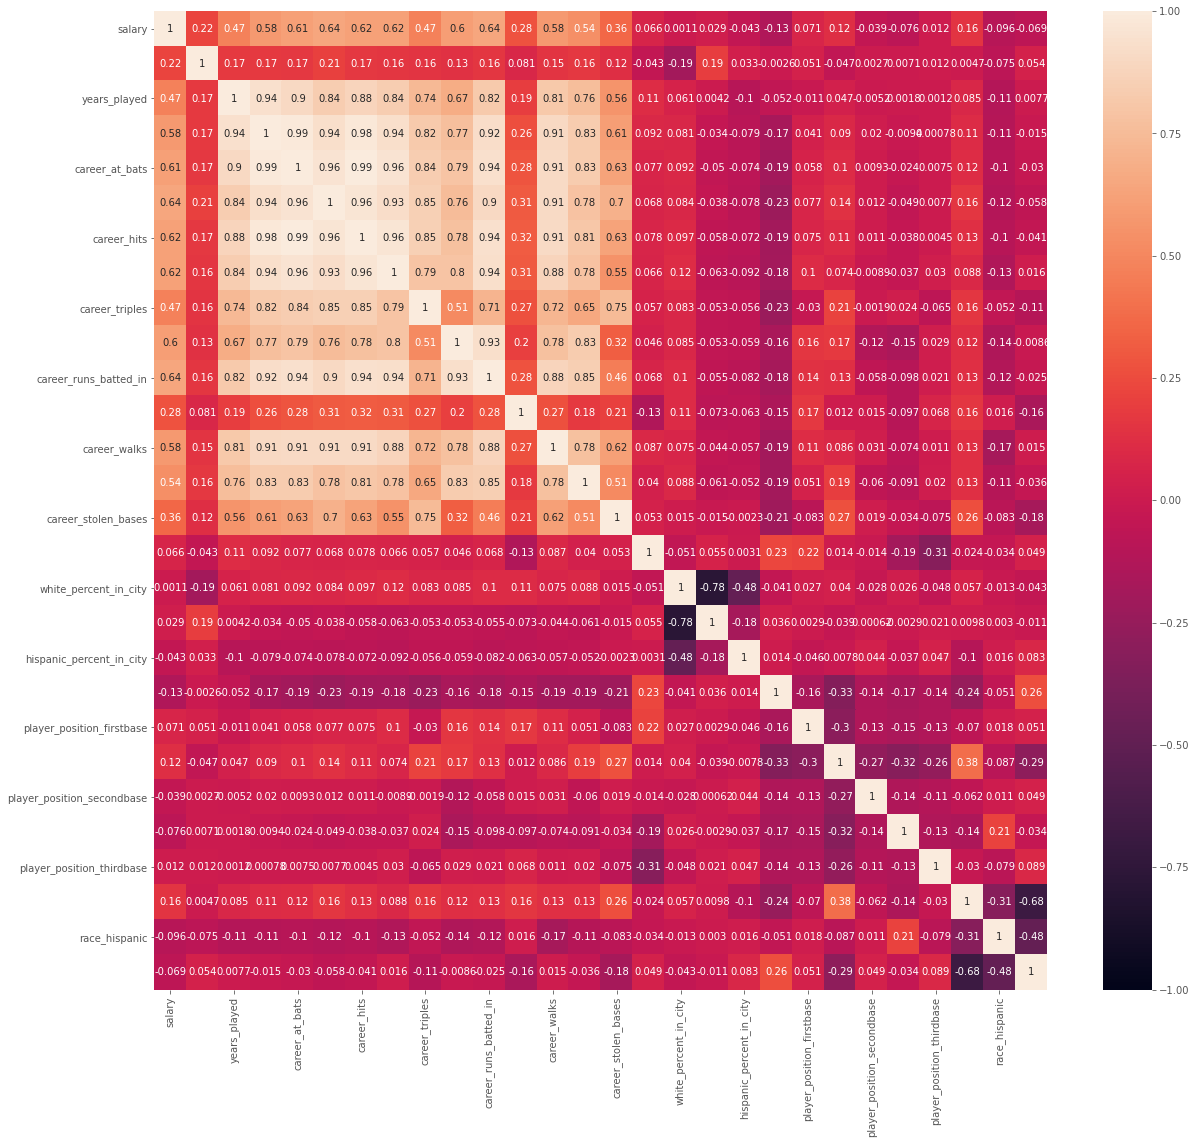

In [39]:
#set an empty canva where to put the matrix  
fig, ax = plt.subplots()

#Display a heatmap 
sns.heatmap(corrMatrix, annot=True, vmin = -1, vmax=1)

#set the graph's size
fig.set_size_inches(20, 18)

A variable can be positively or negativily correlated to another one, depending on the sign before its value. For example, we can see how `career_runs` is positively correlated with our target variable having a Pearson correlation coefficient of 0.64, which does not represent a high correlation but it still one of the highest in this analysis. 

## Linear Regression 

Finally, we are able to perform the multiple linear regresssion analysis. Firstly, we will use all the available predictors in the dataset to predict the target variable. Then, we will check the significance of each independent variables and proceed to the next steps. 

In [40]:
#Store all the predictors in X
X = df_final.drop(["salary"], axis = 1)

#Store the target as y 
y = df_final["salary"]

In [41]:
#import the statsmodels api to perform the linear regression 
import statsmodels.api as sm

#Fit the OLS using all the possible predictors in the dataset 
model = sm.OLS.from_formula("y ~ X", data = df_final).fit()

#Chech the model's summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     14.15
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           1.45e-37
Time:                        22:26:19   Log-Likelihood:                -5351.1
No. Observations:                 352   AIC:                         1.075e+04
Df Residuals:                     327   BIC:                         1.085e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.62e+11   8.06e+11      0.201      0.841   -1.42e+12    1.75e+12
X[0]           0.0139      0.007      2.082      0.038       0.001       0.027
X[1]         -1.7e+05   5.81e+04     -2.928      0.004   -2.84e+05   -5.58e+04
X[2]        1412.3265   1271.447      1.111      0.267   -1088.921    3913.574
X[3]        -242.9813    478.407     -0.508      0.612   -1184.126     698.163
X[4]        3275.7864    828.291      3.955      0.000    1646.334    4905.239
X[5]         251.0148   1450.395      0.173      0.863   -2602.267    3104.297
X[6]        2247.8815   2164.103      1.039      0.300   -2009.439    6505.202
X[7]       -1.348e+04   6581.170     -2.048      0.041   -2.64e+04    -533.092
X[8]        4218.3312   4207.791      1.003      0.317   -4059.426    1.25e+04
X[9]         172.2571   2050.954      0.084      0.933   -3862.471    4206.986
X[10]       3278.5219   1646.384      1.991      0.047      39.681    6517.363
X[11]      -1066.0075    720.472     -1.480      0.140   -2483.352     351.337
X[12]         25.0165    409.052      0.061      0.951    -779.689     829.722
X[13]        -60.9470   1011.670     -0.060      0.952   -2051.151    1929.257
X[14]       4304.9688   3186.770      1.351      0.178   -1964.188    1.06e+04
X[15]      -2.493e+09   1.24e+10     -0.201      0.841   -2.69e+10    2.19e+10
X[16]      -2.493e+09   1.24e+10     -0.201      0.841   -2.69e+10    2.19e+10
X[17]      -2.493e+09   1.24e+10     -0.201      0.841   -2.69e+10    2.19e+10
X[18]        2.91e+10   1.45e+11      0.201      0.841   -2.56e+11    3.14e+11
X[19]        2.91e+10   1.45e+11      0.201      0.841   -2.56e+11    3.14e+11
X[20]        2.91e+10   1.45e+11      0.201      0.841   -2.56e+11    3.14e+11
X[21]        2.91e+10   1.45e+11      0.201      0.841   -2.56e+11    3.14e+11
X[22]        2.91e+10   1.45e+11      0.201      0.841   -2.56e+11    3.14e+11
X[23]        2.91e+10   1.45e+11      0.201      0.841   -2.56e+11    3.14e+11
X[24]       5.821e+10    2.9e+11      0.201      0.841   -5.12e+11    6.28e+11
X[25]       5.821e+10    2.9e+11      0.201      0.841   -5.12e+11    6.28e+11
X[26]       5.821e+10    2.9e+11      0.201      0.841   -5.12e+11    6.28e+11
==============================================================================
Omnibus:                       29.605   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.997
Skew:                           0.629   Prob(JB):                     3.40e-09
Kurtosis:                       4.036   Cond. No.                     1.04e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.33e-15. This might indic

As shown in the linear regression summary table, lots of predictors are statistically insignificant, which it means that we will need to take them out one by one in order to get the most parsimonious model. Moreover, as seen earlier in the Person correlation matrix, this result may have occured because of some multicollinearity between a few independent variables. 

Therefore, after filtering out the most infignificant variables one by one having kept track of the changes in their p-values, the next model represents the final one. 

In [42]:
#Most parsimonious model, all X p_value < 0.05 
model_final = sm.OLS.from_formula("salary ~ team_payroll + career_homeruns + career_batting_average", 
                                                data = df_final).fit()

In [43]:
#chech the summary of the final model 
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     80.62
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           1.28e-39
Time:                        22:26:19   Log-Likelihood:                -5383.5
No. Observations:                 352   AIC:                         1.078e+04
Df Residuals:                     348   BIC:                         1.079e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.376e+06   4.27e+05     -3.222      0.001   -2.22e+06   -5.36e+05
team_payroll               0.0210      0.007      3.180      0.002       0.008       0.034
career_homeruns         1.048e+04    797.836     13.142      0.000    8915.648    1.21e+04
career_batting_average  5755.6354   1513.846      3.802      0.000    2778.197    8733.074
==============================================================================
Omnibus:                       30.629   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.679
Skew:                           0.561   Prob(JB):                     1.63e-11
Kurtosis:                       4.459   Cond. No.                     2.40e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Results - Parsimonious Model and No-Multicollinearity 

Now, we can see from the linear regression summary table that all the independent variables are statistically significant owning a p-value less than 0.05, **thereby this is the most possible parsimonious model.** Moreover, we ended up with only 3 predictors out of the 26 available, which are: `team_payroll`, `career_homerunus`, `career_batting_average`. Unfortunately, the adjusted R squared which represents the goodness of the model, so how much variance in the dependent variable is explained by the dependent variables, it is quite low with a value of 0.475, **which means that our predictors are able to explain only only the 47.5% of variance in the target variable.** Besides, the results of the **Jarque-Bera test on the residuals also indicates that the errors are not distributed normally: the p-value is less than 0.05, therefore we reject the null hypothesis of normal distribution.** Though, we will also visualise the residual distributions in the next step. 

Lastly, as shown in the Pearson correlation matrix below, **this is not only the most parsimonious model but the no-multicollinearity assumption has been satisfied either**, because all the coefficients between each independent variable is lower than 0.7 or higher than -0.7. Unfortunately, this is also the case for the correlation coefficients between each of predictors and the target variables, with `career_homerunus` as the most correlated (positively) variable to `salary`, with a value of 0.6. 

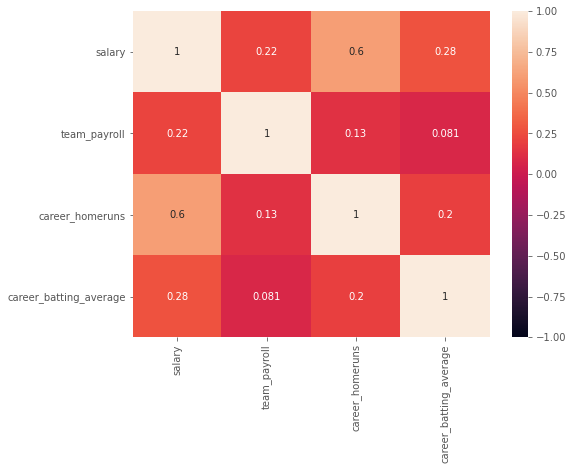

In [44]:
#Subset the dataset for the variables used to perform the final linear regression 
OLS_variablesUsed = df_final[["salary", "team_payroll", "career_homeruns", "career_batting_average"]]

#Compute the corrrelation between each variable using the pearson method 
corrMatrix_OLS = OLS_variablesUsed.corr(method = "pearson") 

#set an empty canva where to put the matrix
fig, ax = plt.subplots()

#Display a heatmap 
sns.heatmap(corrMatrix_OLS, annot=True, vmin = -1, vmax=1)

#set the graph's size
fig.set_size_inches(8, 6)

### Distribution of Residuals 

As already anticipated, though we have already seen the results of the Jarque-Bera test, for the sake of the anlaysis we will now visualise the relationship between the standardized residuals and the fitted values for the dependent variables.

Text(0, 0.5, 'Residuals')

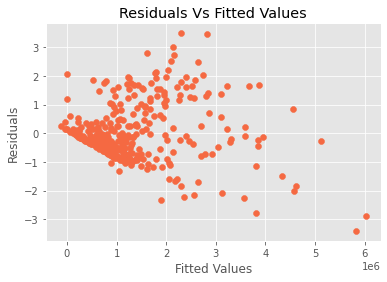

In [45]:
#Get the residuals from the model 
st_resids = model.get_influence().resid_studentized_internal

#Create the scatter plot 
plt.scatter(x = model.fittedvalues, y = st_resids, c="#f56942")

#Change lables 
plt.title("Residuals Vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

The points should be randomly scatterd above and below the value of 0 in the scatter plot. However, it appears that they follow some kind of path, especially at the left side of the graph. We could debate on this, but I would say that this is not a very good model result. However, let us visualise the distribution of errors, which we already know from the Jarque-Bera test that they are not normally distributed but would be nice to have a look a the graph anyway. 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Errors Distribution')

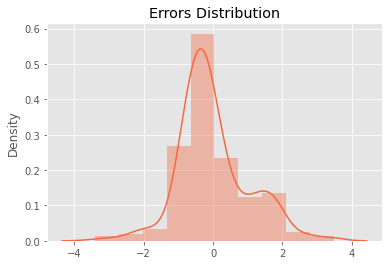

In [46]:
#Plot the distribution of residuals 
sns.distplot(st_resids, bins = 10, color="#f56942")

#Change the title 
plt.title("Errors Distribution")

Although, it may seems that the values are normally distributed, we know from the Jarque-Bera test that the errors are statistically not normal distrubuted. 

### Model Implementation 

Even though, we have analysed how our model is not that good, we will try to  use it to predict the player's salary. This is our multiple liner regression equation: 
$Salary = -1.376e+06 + 0.0210*Team Payroll + 1048000*Career Homeruns + 5755.6354*Career Batting Average$.

In [47]:
#Choose the feature values 
team_payroll = 28743192
career_homeruns = 30
career_batting_average = 287

#Implement the multiple linear regression using the mathematical equation 
salary_predicted =  -1.376e+06 + (0.0210*team_payroll) + (1.048e+04*career_homeruns) + (5755.6354*career_batting_average)

#Print the salary 
print(f"The predicted salary has a value of: ${salary_predicted}")

The predicted salary has a value of: $1193874.3917999999


Finally, our model predicted that with 30 career homee runs, a team payroll of 2,874,3192 dollars and a career batting average of 287, **the player's salary would be 1,193,874.4 dollars. However, we know that due to the model quality we cannot consider this result as reliable.** 